<a href="https://colab.research.google.com/github/nevermind-meow/Practices/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_0_7_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ссылка на материалы:  [пдф тут](https://drive.google.com/file/d/16Cm2tgrpuDH8eIdxdSYyOsfDPqnJ3byd/view?usp=sharing)

ФИО:

In [ ]:
Шмелёв Александр Олегович

## Задание 1. HTTP-запросы, ответы и погода

Описание:

Напишите HTTP-запрос для получения информации о погоде в введенном городе из API.

Можно использовать API: https://open-meteo.com/. Используйте метод GET.


Ввод
```
56.50, 60.35
```

Вывод
```
Сегодня (1.11) погода 20 ◦С, нет осадков, туман
```





In [ ]:
import requests
from datetime import datetime


def send_requests(url):
    response = requests.get(url)
    status_code = response.status_code

    if status_code == 200:
        return response.json()
    return None


def clear_data(data):
    # получение текущей даты
    current_date = datetime.today().date()
    current_date = f'{current_date.day}.{current_date.month}'

    # получение температуры
    temperature  = data['current']['temperature_2m']
    temperature_format = data['current_units']['temperature_2m']

    # получение кода температуры
    weather_code = data['current']['weather_code']

    #определение погоды по коду
    if weather_code in [0,1]:
        weather = 'нет осадков, ясно'
    elif weather_code == 45:
        weather = 'нет осадков, туман'
    elif weather_code in [61,63,65,71,73,75]:
        weather = 'осадки, нет тумана'
    else:
        weather = 'посмотри сам'

    message = f'Сегодня ({current_date}), погода {temperature} {temperature_format}, {weather}'

    return message


def main():
    coordinates = input('Введите ваши координаты').split(', ')
    url = f'https://api.open-meteo.com/v1/forecast?latitude={coordinates[0]}&longitude={coordinates[1]}&current=temperature_2m,weather_code&forecast_days=1'
    data = send_requests(url)
    message = clear_data(data)
    print(message)


main()

Введите ваши координаты56.50, 60.35
Сегодня (31.10), погода 2.0 °C, нет осадков, ясно


## Задание 2. HTTP-запросы, ответы и покемоны

**Описание:**


Создайте код программы, которая будет взаимодействовать с API, со следующим функионалом:

1. Используя метод GET, отправьте запрос на endpoint /pokemon, чтобы получить список первых 20 покемонов

2. Извлеките имена покемонов из ответа и выведите их списком

3. Введите с помощью input() название одного из покемонов


```
Имя покемона: clefairy
```



4. Отправьте GET-запрос, чтобы получить полную информацию о выбранном покемоне

5. Извлеките и выведите следующие данные о введенном покемоне:

     • Имя

     • Тип

     • Вес

     • Рост

     • Способности

Используйте PokéAPI (https://pokeapi.co/), который предоставляет информацию о покемонах, их характеристиках, типах и другую информацию.

In [ ]:
#{'count': 1302,
# 'next': 'https://pokeapi.co/api/v2/pokemon?offset=20&limit=20',
# 'previous': None,
# 'results': [{'name': 'bulbasaur','url': 'https://pokeapi.co/api/v2/pokemon/1/'},
#  {'name': 'ivysaur', 'url': 'https://pokeapi.co/api/v2/pokemon/2/'},
#  {'name': 'venusaur', 'url': 'https://pokeapi.co/api/v2/pokemon/3/'},
#  {'name': 'charmander', 'url': 'https://pokeapi.co/api/v2/pokemon/4/'},
#  {'name': 'charmeleon', 'url': 'https://pokeapi.co/api/v2/pokemon/5/'},
#  {'name': 'charizard', 'url': 'https://pokeapi.co/api/v2/pokemon/6/'},
#  {'name': 'squirtle', 'url': 'https://pokeapi.co/api/v2/pokemon/7/'},
#  {'name': 'wartortle', 'url': 'https://pokeapi.co/api/v2/pokemon/8/'},
#  {'name': 'blastoise', 'url': 'https://pokeapi.co/api/v2/pokemon/9/'},
#  {'name': 'caterpie', 'url': 'https://pokeapi.co/api/v2/pokemon/10/'},
#  {'name': 'metapod', 'url': 'https://pokeapi.co/api/v2/pokemon/11/'},
#  {'name': 'butterfree', 'url': 'https://pokeapi.co/api/v2/pokemon/12/'},
#  {'name': 'weedle', 'url': 'https://pokeapi.co/api/v2/pokemon/13/'},
#  {'name': 'kakuna', 'url': 'https://pokeapi.co/api/v2/pokemon/14/'},
#  {'name': 'beedrill', 'url': 'https://pokeapi.co/api/v2/pokemon/15/'},
#  {'name': 'pidgey', 'url': 'https://pokeapi.co/api/v2/pokemon/16/'},
#  {'name': 'pidgeotto', 'url': 'https://pokeapi.co/api/v2/pokemon/17/'},
#  {'name': 'pidgeot', 'url': 'https://pokeapi.co/api/v2/pokemon/18/'},
#  {'name': 'rattata', 'url': 'https://pokeapi.co/api/v2/pokemon/19/'},
#  {'name': 'raticate', 'url': 'https://pokeapi.co/api/v2/pokemon/20/'}]}

In [ ]:
import requests


def send_request(url):
    response = requests.get(url)
    status_code = response.status_code
    if status_code == 200:
        return response.json()
    return None


pokemon_names = []
for number in range(1, 21):
    url = f'https://pokeapi.co/api/v2/pokemon/{number}/'
    data = send_request(url)
    name = data['name']
    pokemon_names.append(name)
print(pokemon_names)

user_pokemon = input('Введите имя покемона: ')
url_name = f'https://pokeapi.co/api/v2/pokemon/{user_pokemon}/'
data_name = send_request(url_name)
print('Имя покемона:', data_name['name'])

data_types = send_request(url_name)
types = data_types['types']
for pokemon_type in types:
    for k, v in pokemon_type.items():
        if k == 'type':
            print('Тип покемона:', v['name'])

print('Вес покемона:', data_name['weight'])
print('Рост покемона:', data_name['height'])

abilities = data_name['abilities']
all_abilities = []

for ability in abilities:
    for k, v in ability.items():
        if k == 'ability':
            all_abilities.append(v['name'])

print('Способности покемона:', all_abilities)


['bulbasaur', 'ivysaur', 'venusaur', 'charmander', 'charmeleon', 'charizard', 'squirtle', 'wartortle', 'blastoise', 'caterpie', 'metapod', 'butterfree', 'weedle', 'kakuna', 'beedrill', 'pidgey', 'pidgeotto', 'pidgeot', 'rattata', 'raticate']
Введите имя покемона: clefairy
Имя покемона: clefairy
Тип покемона: fairy
Вес покемона: 75
Рост покемона: 6
Способности покемона: ['cute-charm', 'magic-guard', 'friend-guard']


## Задание 3. HTTP-запросы, ответы и посты

**Описание:**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API, реализуя следующие функции:

1. Реализуйте функцию, которая выполняет GET-запрос к https://jsonplaceholder.typicode.com/posts и возвращает список постов в формате JSON

2. Реализуйте функцию, котороая получает вводимое ID поста, выполняет GET-запрос по ID и возвращает данные поста в формате JSON

3. Реализуйте функцию, которая выполняет обработку JSON из пункта 2 и выводит всю важную информацию в консоль

In [ ]:
import requests


def send_requests(url):
    response = requests.get(url)
    status_code = response.status_code
    if status_code == 200:
        return response.json()
    return None


def post_id():
    url = f'https://jsonplaceholder.typicode.com/posts/{id}'
    post = requests.get(url)
    status_code = post.status_code
    if status_code == 200:
        return post.json()
    return None


def important():
    post = post_id()
    userId = ''
    title = ''
    body = ''
    for key in post.keys():
        if key == 'userId':
            title += f'Автор поста: {post_id()[key]}'

        if key == 'title':
            title += f'Название поста: {post_id()[key]}'

        if key == 'body':
            body += f"Cодеражание поста: {post_id()[key]}"

    return (f"{userId},\n{title}, \n{body}")


url = 'https://jsonplaceholder.typicode.com/posts'
id = int(input('Введите ID поста:'))


print(send_requests(url))
print(post_id())
print(important())

Введите ID поста:31
[{'userId': 1, 'id': 1, 'title': 'sunt aut facere repellat provident occaecati excepturi optio reprehenderit', 'body': 'quia et suscipit\nsuscipit recusandae consequuntur expedita et cum\nreprehenderit molestiae ut ut quas totam\nnostrum rerum est autem sunt rem eveniet architecto'}, {'userId': 1, 'id': 2, 'title': 'qui est esse', 'body': 'est rerum tempore vitae\nsequi sint nihil reprehenderit dolor beatae ea dolores neque\nfugiat blanditiis voluptate porro vel nihil molestiae ut reiciendis\nqui aperiam non debitis possimus qui neque nisi nulla'}, {'userId': 1, 'id': 3, 'title': 'ea molestias quasi exercitationem repellat qui ipsa sit aut', 'body': 'et iusto sed quo iure\nvoluptatem occaecati omnis eligendi aut ad\nvoluptatem doloribus vel accusantium quis pariatur\nmolestiae porro eius odio et labore et velit aut'}, {'userId': 1, 'id': 4, 'title': 'eum et est occaecati', 'body': 'ullam et saepe reiciendis voluptatem adipisci\nsit amet autem assumenda provident rer

## Задание 4. HTTP-запросы, ответы и работа с постами

**Описание**

Создайте программу, которая будет взаимодействовать с JSONPlaceholder API (из предыдущего задания), реализуя новые функции:

1. Реализуйте функцию, которая принимает заголовок, содержимое и ID пользователя (информация вводится с помощью input()), выполняет POST-запрос для создания нового поста и возвращает информацию о созданном посте в формате JSON


```
Заголовок: Новый пост
Содержимое поста: Тут должно находиться содержимое нового поста...
ID пользователя: 10
```



2. Реализуйте функцию, которая принимает ID поста, новый заголовок и новое содержимое, выполняет PUT-запрос и возвращает обновлённый пост в формате JSON

3. Реализуйте функцию, которая принимает ID поста, выполняет DELETE-запрос и возвращает статус-код ответа

In [ ]:
import requests


def send_requests(url):
    response = requests.get(url)
    status_code = response.status_code
    if status_code == 200:
        return response.json()
    return None


def post_id():
    url = f'https://jsonplaceholder.typicode.com/posts/{id}'
    post = requests.get(url)
    status_code = post.status_code
    if status_code == 200:
        return post.json()
    return None


def important():
    post = post_id()
    title = ''
    body = ''
    for key in post.keys():
        if key == 'title':
            title += f'Название поста: {post_id()[key]}'
        if key == 'body':
            body += f'Cодержание поста: {post_id()[key]}'
    return f"{title}, \n{body}"


def new_post():
    title = input('Введите заголовок поста: ')
    body = input('Введите содержимое: ')
    id = int(input('Введите ID пользователя: '))
    parameters = {'userId': id,
                  'id': highest_id,
                  'title': title,
                  'body': body}
    fresh_post = requests.post(url, parameters)
    return f"Ваш созданный пост: {fresh_post.json()}"


def post_update():
    url = f'https://jsonplaceholder.typicode.com/posts/'
    post = requests.get(url).json()

    id = int(input('Введите ID существующего поста, который хотите обновить: '))
    highest_id = len(post)
    while id>=highest_id or id<=0:
        id = int(input('Ваш ID некорректен. Введите ID существующего поста, который хотите обновить: '))
    title_update = input('Введите новое название: ')
    body_update = input('Введите новое содержимое поста: ')

    url = f'https://jsonplaceholder.typicode.com/posts/{id}'
    old_id = requests.get(url).json()['userId']
    parameters = {'userId': old_id,
                  'id': id,
                  'title': title_update,
                  'body': body_update}

    updated_post = requests.put(url, parameters)
    return f"Ваш обновленный пост: {updated_post.json()}"


def delete_post():
    url = f'https://jsonplaceholder.typicode.com/posts/'
    post = requests.get(url).json()
    id = int(input('Введите ID поста, который хотите удалить: '))
    highest_id = len(post)
    while id >= highest_id or id <= 0:
        id = int(input('Введите ID поста, который хотите удалить: '))
    url = f'https://jsonplaceholder.typicode.com/posts/{id}'
    post = requests.delete(url)
    return f'Вы удалили пост id={id}'


url = 'https://jsonplaceholder.typicode.com/posts'
highest_id = 0

for key in send_requests(url):
    highest_id = key

print(new_post()) #1
print(post_update()) #2
print(delete_post()) #3

Введите заголовок поста: Математика
Введите содержимое: Пора готовиться к кр
Введите ID пользователя: 2507
Ваш созданный пост: {'userId': '2507', 'id': 101, 'title': 'Математика', 'body': 'Пора готовиться к кр'}
Введите ID существующего поста, который хотите обновить: 3
Введите новое название: Обновленный пост
Введите новое содержимое поста: Обновил пост и тестирую
Ваш обновленный пост: {'userId': '1', 'id': 3, 'title': 'Обновленный пост', 'body': 'Обновил пост и тестирую'}
Введите ID поста, который хотите удалить: 1
Вы удалили пост id=1


## Задание 5. HTTP-запросы, ответы и пёсики

**Описание**

Создайте программу, которая будет взаимодействовать с Dog API, которая позволит получать список пород собак, вводить несколько пород и получать их фотогрфии.

Этапы:

1. Создайте функцию, которая использует метод GET и возвращает список всех пород собак в формате нумерованного списка

2. Реализуйте возможность ввода нескольких пород собак через запятую


```
african, chow, dingo
```



3. Создание функции, которая реализует запрос, возвращает и выводит изображениия собак, породы которых были введены до этого


Используйте Dog API (https://dog.ceo/dog-api/), который предоставляет информацию о породах собак и их изображения.


*Подсказка*



```
import requests
from PIL import Image
from IPython.display import display
import io

url = <____>
response = <____>
        
if response.<______> == <___>:
      image_url = response.json()['message']

res = requests.<__>(image_url)
img = Image.open(io.BytesIO(res.content))
display(img)
```



Введите породы собак через запятую: african, chow, dingo
Порода собаки: african


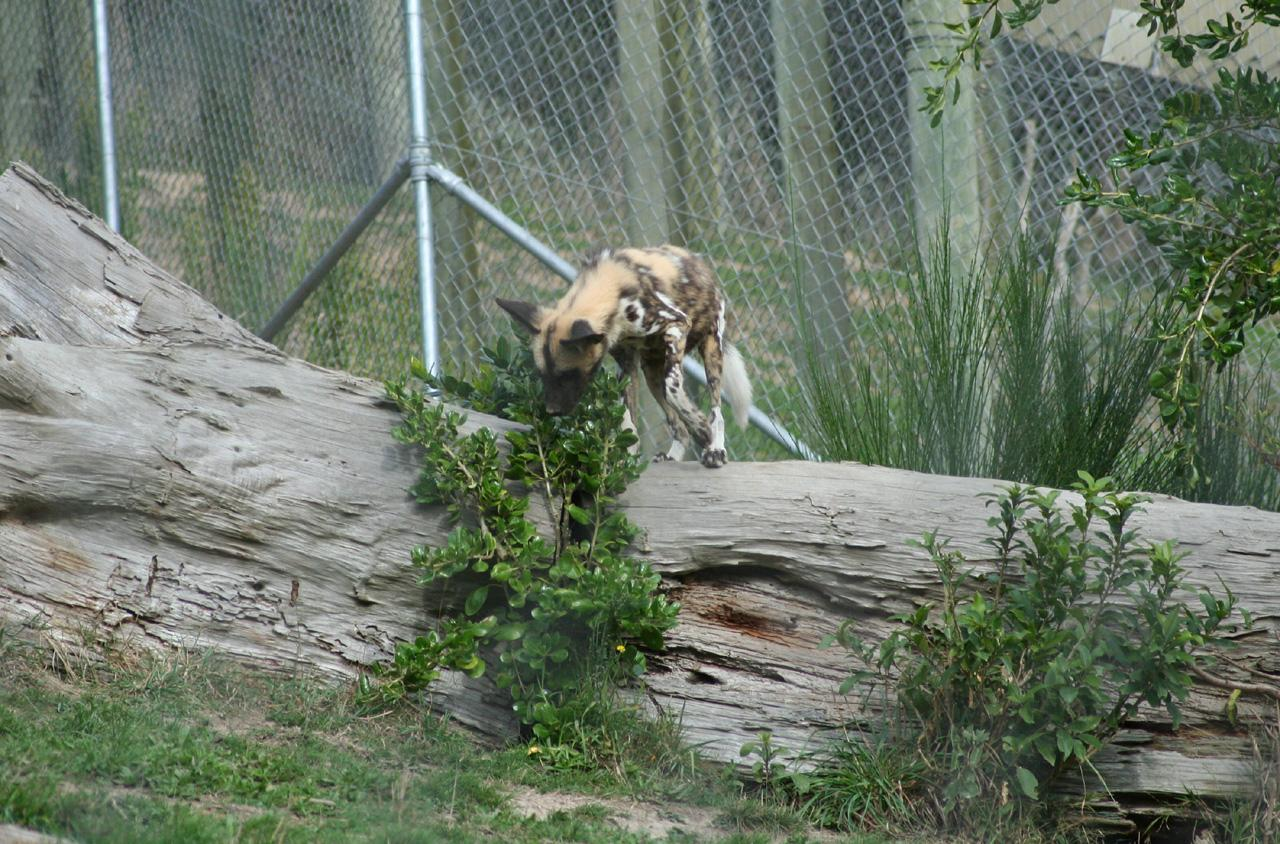

Порода собаки: chow


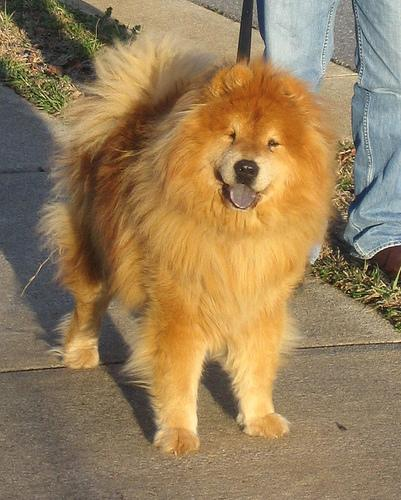

Порода собаки: dingo


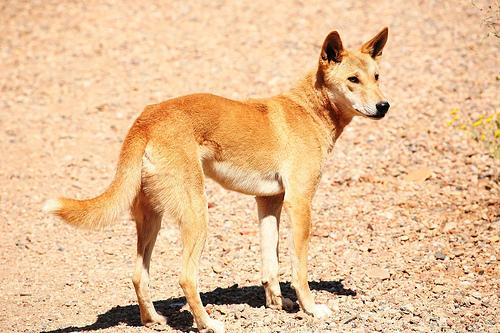

In [ ]:
import requests
from PIL import Image
from IPython.display import display
import io


def dog_breeds(url):
    response = requests.get(url)
    status_code = response.status_code

    if status_code in range(200,202):
        return response.json()
    return None


url = 'https://dog.ceo/api/breeds/list/all'
breeds = dog_breeds(url)
dogs = {} #словарь с номерами и названиями пород
number = 0


for v in breeds.values():
    if type(v) is dict:
        for k in v.keys():
            number += 1
            dogs[number] = k

user_breeds = input('Введите породы собак через запятую: ').split(', ')

for breed in dogs.values():
    if breed in user_breeds:
        print(f'Порода: {breed}')
        url = f'https://dog.ceo/api/breed/{breed}/images/random'
        response = requests.get(url)
        image_url = response.json()['message']

        res = requests.get(image_url)
        img = Image.open(io.BytesIO(res.content))
        display(img)